*italicized text*# Graph Data Analytics

In [1]:
#!conda install networkx --yes

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def pagerank_centrality(G, iter=100):
    p =np.array([1 for i in G.nodes()])

    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                p[i] += G.number_of_edges(i, j) * p[j] / G.degree[j]

        norm = sum(p)
        p = p . norm
    return p

G = nx.karate_club_graph()
print(nx.info(G))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


C:\Users\lachl\AppData\Local\Temp\ipykernel_3932\977581689.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


### Calculate page rank by using simple degree centrality

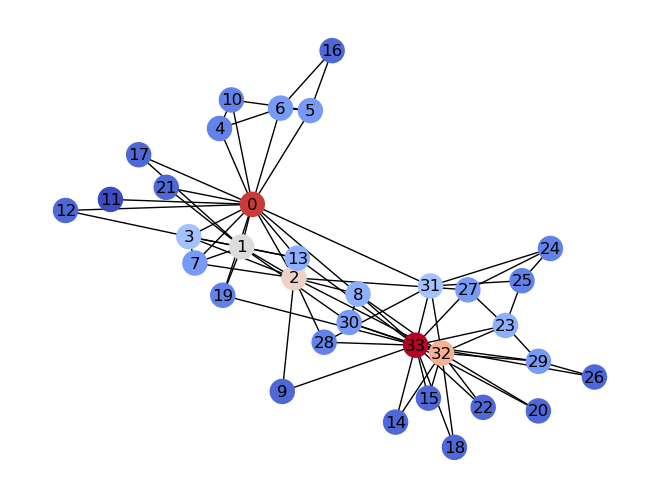

In [7]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


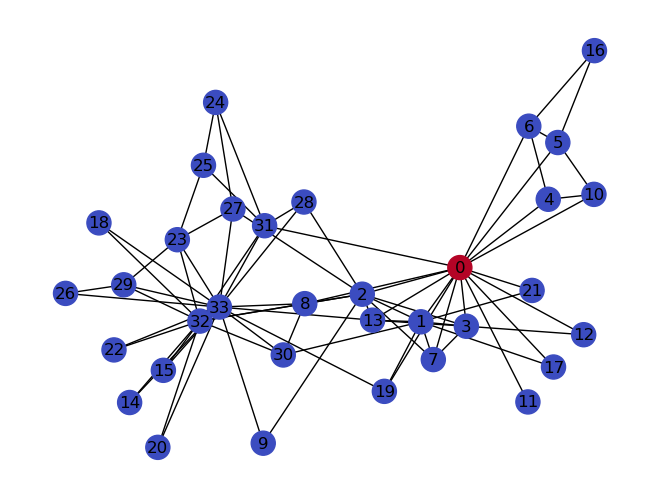

In [8]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [36]:
from itertools import combinations

def get_percolated_cliques(G, k):
    perc_graph = nx.Graph()

    cliques = list(frozenset(c) for c in nx.find_cliques(G) if len(c) >= k)
    perc_graph.add_nodes_from(cliques)

    for c1, c2 in combinations(cliques, 2):
        if len(c1.intersection(c2)) >= (k-1):
            perc_graph.add_edge(c1, c2)

    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
---0.0 seconds---


C:\Users\lachl\AppData\Local\Temp\ipykernel_3932\1077277946.py:12: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


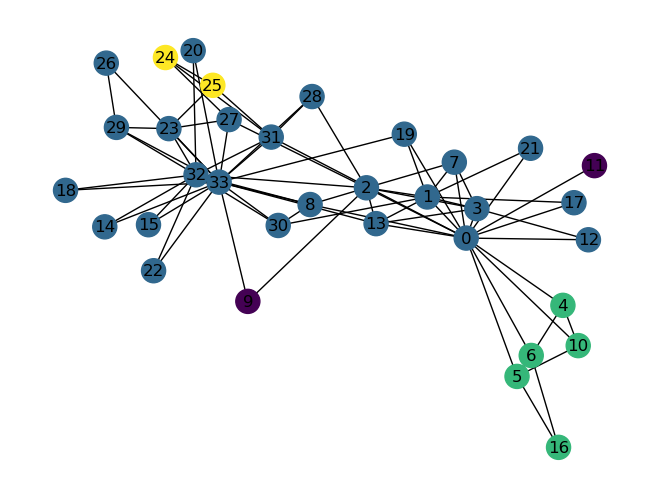

In [37]:
def partition(communities):
    node2communities = dict()

    for counter, c in enumerate(communities):
        for node in c:
            if node not in node2communities:
                node2communities[node] = []
            node2communities[node] += [counter]
    return node2communities
    
G = nx.karate_club_graph()
print(nx.info(G))

import time
start_time = time.time()
communities = get_percolated_cliques(G,3)
print("---{0} seconds---".format(time.time() - start_time))
part = partition(communities)
values = [part.get(node,[-1])[0] for node in G.nodes()]

nx.draw(G, node_color = values, with_labels = True)

---0.0 seconds ---


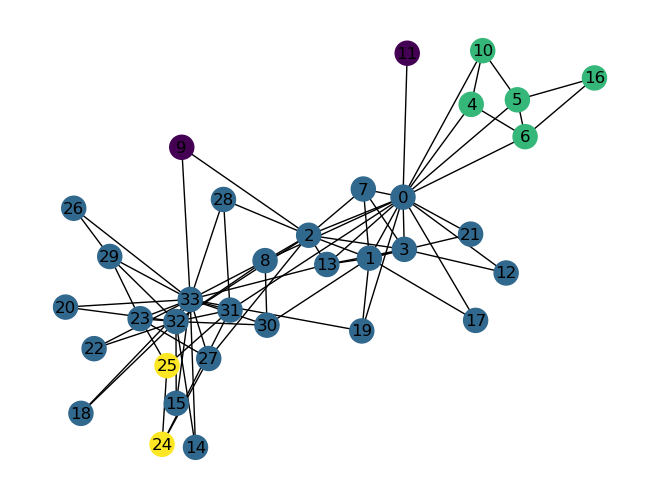

In [38]:
from collections import defaultdict

def get_percolated_cliques2(G, k):
    perc_graph = nx.Graph()
    cliques = [frozenset(c) for c in nx.find_cliques(G) if len(c) >= k]
    perc_graph.add_nodes_from(cliques)

    membership_dict = defaultdict(list)
    for clique in cliques:
        for node in clique:
            membership_dict[node].append(clique)

    for clique in cliques:
        for adj_clique in get_adjacent_cliques(clique, membership_dict):
            if len(clique.intersection(adj_clique)) >= (k - 1):
                perc_graph.add_edge(clique, adj_clique)

    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

def get_adjacent_cliques(clique, membership_dict):
    adjacent_cliques = set()

    for n in clique:
        for adj_clique in membership_dict[n]:
            if clique != adj_clique:
                adjacent_cliques.add(adj_clique)
    return adjacent_cliques

start_time = time.time()
communities = get_percolated_cliques2(G, 3)
print("---{0} seconds ---".format(time.time() - start_time))
part = partition(get_percolated_cliques2(G,3))

values = [part.get(node,[-1])[0] for node in G.nodes()]

nx.draw(G, node_color = values, with_labels = True)

In [40]:
G = nx.read_edgelist("com-amazon.ungraph.txt")
print(nx.info(G))

start_time = time.time()
communities = get_percolated_cliques(G, 3)
print("---{0} seconds---".format(time.time() - start_time))

start_time = time.time()
communities = get_percolated_cliques2(G, 3)
print("---{0} seconds---".format(time.time() - start_time))

Graph with 334863 nodes and 925872 edges
---0.0 seconds---
---0.0 seconds---


C:\Users\lachl\AppData\Local\Temp\ipykernel_3932\3262083242.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [5]:
G = nx.read_edgelist("gr0.California.edegs.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(nx.info(G))
G1 = G.subgraph(list(G.nodes())[100:150])
print(nx.info(G1))

NameError: name 'nx' is not defined

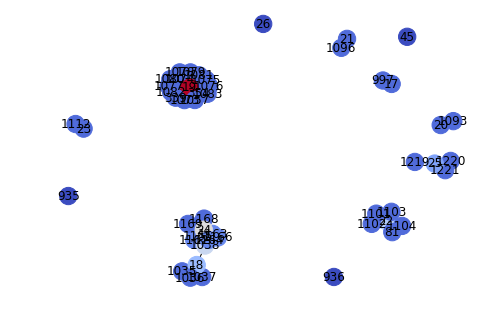

In [ ]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


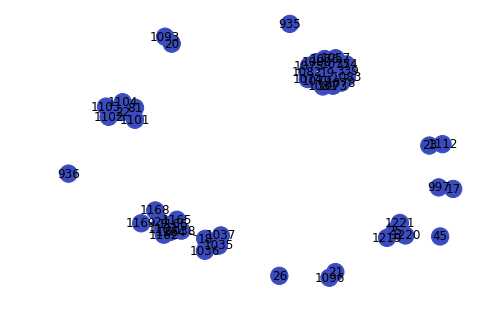

In [ ]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)